# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [41]:
datapath = "~/teigen_data/output_rows.csv"

In [42]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [43]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'datetime', u'length [mm]', u'volume [mm^3]', u'surface [mm^2]',
       u'area volume [mm^3]', u'count []', u'numeric volume [mm^3]',
       u'numeric surface [mm^2]', u'length d. [mm^-2]', u'volume d. []',
       u'surface d. [mm^-1]', u'appearance noise_preview',
       u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'areasampling areasize_mm',
       u'areasampling areasize_px', u'areasampling voxelsize_mm',
       u'filepattern', u'generator_id',
       u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes r

In [44]:
df

,datetime,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],volume d. [],...,postprocessing limit_negative_intensities,postprocessing measurement_resolution,postprocessing negative,postprocessing noise_amplitude,postprocessing noise_exponent,postprocessing noise_lambda_start,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype
0,2017-05-22T22:11:32.751630,91.646204,48575.771341,9966.201270,1100000.0,5.0,47956.991308,9921.767511,0.000083,0.044160,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
1,2017-05-22T22:11:42.437197,91.646204,48575.771341,9966.201270,1100000.0,5.0,48285.481418,9968.672278,0.000083,0.044160,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
2,2017-05-22T22:11:55.449016,91.646204,48575.771341,9966.201270,1100000.0,5.0,48370.016526,9966.028915,0.000083,0.044160,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
3,2017-05-22T22:12:03.524121,97.149456,40791.294328,9976.234307,1100000.0,5.0,40308.884459,9934.434743,0.000088,0.037083,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
4,2017-05-22T22:12:10.573205,97.149456,40791.294328,9976.234307,1100000.0,5.0,40579.448369,9981.935058,0.000088,0.037083,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
5,2017-05-22T22:12:22.183569,97.149456,40791.294328,9976.234307,1100000.0,5.0,40653.426102,9978.646174,0.000088,0.037083,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
6,2017-05-22T22:12:28.736424,68.952896,103085.794607,13681.856199,1100000.0,5.0,101749.593495,13613.353756,0.000063,0.093714,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
7,2017-05-22T22:12:38.643606,68.952896,103085.794607,13681.856199,1100000.0,5.0,102418.010047,13677.924029,0.000063,0.093714,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
8,2017-05-22T22:12:59.840795,68.952896,103085.794607,13681.856199,1100000.0,5.0,102609.284808,13671.071766,0.000063,0.093714,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
9,2017-05-22T22:13:20.768410,101.667510,34395.140878,8832.561203,1100000.0,5.0,33999.620746,8795.686542,0.000092,0.031268,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8


In [45]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [46]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot(x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],measurement_resolution


In [47]:

#sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))


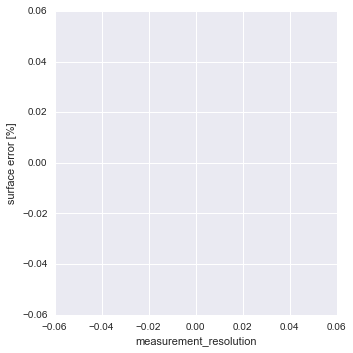

In [48]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [49]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)
# dfsp

In [50]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)


In [51]:
import seaborn as sns

In [52]:
pd.__path__

['/Users/mjirik/miniconda/lib/python2.7/site-packages/pandas']

In [53]:
pd.__version__

u'0.20.1'

In [54]:
## element_number = 10, 
df["output note"]

0                            fixed resolution inscribed
1                              fixed resolution average
2                                 fixed resolution best
3                            fixed resolution inscribed
4                              fixed resolution average
5                                 fixed resolution best
6                            fixed resolution inscribed
7                              fixed resolution average
8                                 fixed resolution best
9                            fixed resolution inscribed
10                             fixed resolution average
11                                fixed resolution best
12                           fixed resolution inscribed
13                             fixed resolution average
14                                fixed resolution best
15                           fixed resolution inscribed
16                             fixed resolution average
17                                fixed resoluti

## Compensation methods

In [55]:
def dfplot(dfs, plotkw, radius_method=""):
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    if len(dfsp) < 1:
        return dfsp
    # wilcoxon - čím větší, tím lepší, alespoň 0.05
    surf_w = scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    surf_s = scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])
    
    # wilcoxon - čím větší, tím lepší
    vol_w = scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    vol_s = scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])
    
    print radius_method, ": \nsurface (w/s): \n" , surf_w,"\n", surf_s, "\nvolume (w/s): \n", vol_w, "\n",vol_s
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)
    return dfsp

### 1 sphere

In [87]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    dfplot(dfs, plotkw, radius_method)
    


### 1 tube

In [57]:
for radius_method in ["cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


## 5 tubes

In [58]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)
#     dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
#         "measurement_resolution")
#     
#     fig = plt.figure(figsize=[25, 18])
#     ax = plt.subplot(121)
#     dfsp.plot(
#         ax=ax, x="measurement_resolution", **plotkw)
#     ax = plt.subplot(122)
#     dfsp[["surface error [%]", "volume error [%]"]].plot(
#         ax=ax, kind="box", **plotkw)
#     plt.suptitle(radius_method)
# 

In [59]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


### Radius estimation

In [60]:
dfs[["volume [mm^3]"]]

,volume [mm^3]


In [61]:
### Kontrolní výpočet objemu

In [62]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [63]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [64]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [67]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["output note"] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]


In [68]:
if len(dfsp) > 0:
    axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [71]:
if len(dfsp) > 0:
    axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [72]:
if len(dfsp) > 0:
    axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [73]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)


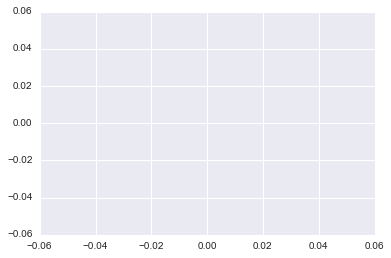

In [74]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [75]:
y.shape

(0,)

In [76]:
x.shape

(0,)

In [77]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


# Statistics

inscribed : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0033456181158508813) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0033456181158508813) 
SpearmanrResult(correlation=1.0, pvalue=0.0)
average : 
surface (w/s): 
WilcoxonResult(statistic=7.0, pvalue=0.02079521585359911) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0033456181158508813) 
SpearmanrResult(correlation=1.0, pvalue=0.0)
cylinder volume + sphere compensation : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0033456181158508813) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0033456181158508813) 
SpearmanrResult(correlation=1.0, pvalue=0.0)
best : 
surface (w/s): 
WilcoxonResult(statistic=22.0, pvalue=0.57506213017394969) 
SpearmanrResult(correlation=0.99999999999999989, pvalue=6.646897422032013e-64) 
volume (w/s): 
WilcoxonResult(statistic=0

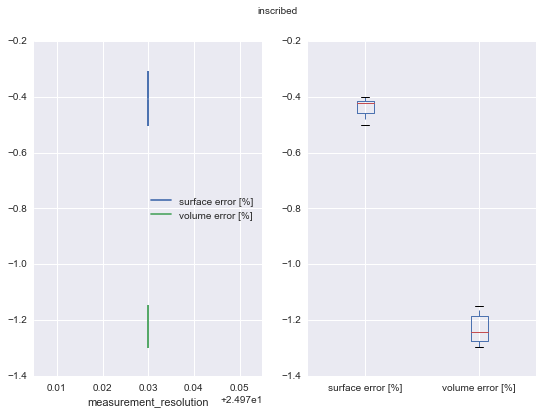

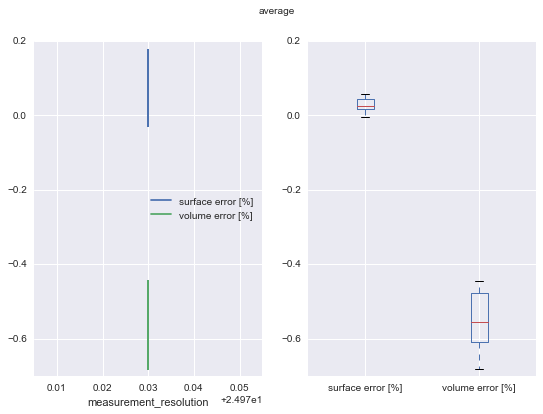

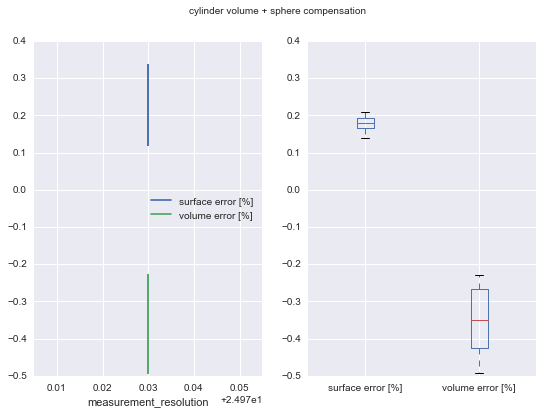

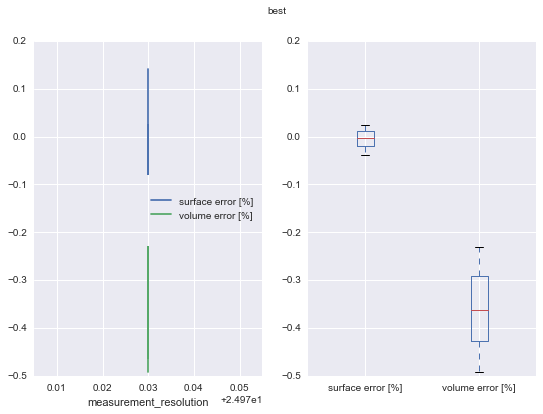

In [78]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    "cylinder volume + sphere compensation", 
    "best"]:

        
    dfs = df[
        df["output note"] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    dfplot(dfs, plotkw, radius_method)


In [79]:
dfs

,datetime,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],volume d. [],...,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype,surface error [mm^2],surface error [%],volume error [mm^3],volume error [%],measurement_resolution,length_distribution_mean
2,2017-05-22T22:11:55.449016,91.646204,48575.771341,9966.201270,1100000.0,5.0,48370.016526,9966.028915,0.000083,0.044160,...,3.0,30.0,0,uint8,-0.172354,-0.001729,-205.754815,-0.423575,25,30.0
5,2017-05-22T22:12:22.183569,97.149456,40791.294328,9976.234307,1100000.0,5.0,40653.426102,9978.646174,0.000088,0.037083,...,3.0,30.0,0,uint8,2.411867,0.024176,-137.868226,-0.337984,25,30.0
8,2017-05-22T22:12:59.840795,68.952896,103085.794607,13681.856199,1100000.0,5.0,102609.284808,13671.071766,0.000063,0.093714,...,3.0,30.0,0,uint8,-10.784433,-0.078823,-476.509799,-0.462246,25,30.0
11,2017-05-22T22:13:46.955176,101.667510,34395.140878,8832.561203,1100000.0,5.0,34306.664708,8833.855107,0.000092,0.031268,...,3.0,30.0,0,uint8,1.293905,0.014649,-88.476170,-0.257235,25,30.0
14,2017-05-22T22:14:18.655707,106.199779,74876.213887,13538.927556,1100000.0,5.0,74614.057799,13538.106641,0.000097,0.068069,...,3.0,30.0,0,uint8,-0.820915,-0.006063,-262.156088,-0.350119,25,30.0
17,2017-05-22T22:14:56.471696,109.558252,95782.385525,16113.128641,1100000.0,5.0,95372.342267,16109.504529,0.000100,0.087075,...,3.0,30.0,0,uint8,-3.624112,-0.022492,-410.043258,-0.428099,25,30.0
20,2017-05-22T22:15:42.465021,60.914931,74324.377243,13705.281800,1100000.0,5.0,74047.041819,13700.044565,0.000055,0.067568,...,3.0,30.0,0,uint8,-5.237236,-0.038213,-277.335425,-0.373142,25,30.0
23,2017-05-22T22:16:11.631913,110.441125,61735.644010,12488.548713,1100000.0,5.0,61564.671864,12489.170187,0.000100,0.056123,...,3.0,30.0,0,uint8,0.621475,0.004976,-170.972146,-0.276942,25,30.0
26,2017-05-22T22:16:54.121826,105.345568,72467.901294,12916.535988,1100000.0,5.0,72301.094796,12914.730348,0.000096,0.065880,...,3.0,30.0,0,uint8,-1.805640,-0.013979,-166.806498,-0.230180,25,30.0
29,2017-05-22T22:17:10.766473,54.376393,175400.816567,16592.818099,1100000.0,2.0,174538.050039,16616.154544,0.000049,0.159455,...,3.0,30.0,0,uint8,23.336445,0.140642,-862.766528,-0.491883,25,30.0


## Surface

In [80]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=22.0, pvalue=0.57506213017394969)

In [81]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=24.0, pvalue=0.7212766990291557)

In [82]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

SpearmanrResult(correlation=0.99999999999999989, pvalue=6.646897422032013e-64)

## Volume

In [83]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=0.0050620321262678644)

In [84]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

SpearmanrResult(correlation=0.99999999999999989, pvalue=6.646897422032013e-64)

# Inscribed to circum

In [85]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [86]:
np.cos(np.pi/2)

6.123233995736766e-17